# Estudio matemático de las relaciones entre las dimensiones morfológicas y el peso

## Justificación matemática y biológica

La relación entre la longitud y el peso en peces suele seguir la ley cúbica ($W\propto L^{3}$), pero en peces planos como el lenguado, la relación superficie-peso es más adecuada, ya que su cuerpo es achatado y su crecimiento no es isométrico. Los trabajos de [[Froese, 2006](https://doi.org/10.1111/j.1439-0426.2006.00805.x)] y [[Haddon et al., 2011]](https://doi.org/10.1111/j.1751-5823.2012.00179\_26.x) pusieron de manifiesto que en peces planos existe una correlación entre el peso del individuo ($W$) y la superficie ($S$) del mismo que viene dada por la expresión matemática:

```{math}
:label: eq_peso-superficie
W=aS^b
```
en donde:
- $a$ es un coeficiente empírico que depende de la especie y las condiciones de cultivo.
- $b$ es un exponente que describe la tasa de crecimiento en función de la superficie.

ya que la altura es menos predictiva que la longitud - anchura (L/A) que sólo contribuye $\sim5\%$ en modelos morfológicos.

Para obtener valores específicos de ay b, se suelen ajustar datos experimentales usando regresión no lineal minimizando el error cuadrático medio:

```{math}
:label: eq_ECM
ECM=\dfrac{1}{N}\sum_{i=1}^N(W_i-aS_i^b)^2
```

[[Torres et al., 2012]](https://doi.org/10.1111/j.1095-8649.2011.03223.x) recoge que en experimentos realizados con peces planos de las familias Soleidae y Pleuronectidae los coeficientes de la ecuación (1) toman los siguientes valores:

```{math}
a\approx0,03\quad b\approx1,1-1,4
```

habiendo estimado que en el caso concreto del lenguado estos coeficientes son: $a=0.024\quad b=1.32$

Los recientes estudios de [[El-Bokhty et al., 2023]](https://doi.org/10.21608/ejabf.2023.322449) ponen en entredicho la ecuación (1) y sugieren que el crecimiento alométrico positivo del lenguado común (*Solea solea*) responde a la variable morfológica de longitud ($L$) que se ajusta a la expresión matemática:

```{math}
:label: eq_peso-longitud
W=a\cdot L^b
```
Concluyendo, en sus trabajos, que los coeficientes de dicha expresión son:

```{math}
a\approx0,00029\quad b\approx3,3777
```

Sin embargo, una investigación realizada en las aguas costeras de Pakistán analizó seis especies de peces planos y encontró variaciones significativas en parámetros como la longitud, la anchura y el peso entre las diferentes especies [[W. Ali et al., 2021]](https://doi.org/10.19080/OFOAJ.2021.14.555884).  Aunque este estudio no presentó una fórmula específica que relacione el peso con la longitud y la anchura simultáneamente, sugiere que la anchura es una medida morfológica relevante en la evaluación de las relaciones morfométricas en peces planos. Ambas variables podrían relacionarse mediante la siguiente expresión matemática:

```{math}
:label: eq_peso-longitud_anchura
W=k\cdot L^a \cdot A^b
```
en donde:
- $W$ = peso,
- $L$ = longitud,
- $A$ = anchura, 
- $k$, $a$, $b$ = parámetros específicos por especie

Por otro lado [[Freitas et al.,2021]](https://doi.org/0.1016/j.aqrep.2021.100676) en sus trabajos con *Paralichthys olivaceus* (falso Halibut del japón) apuntán a que una relación volumétrica es más adecuada si se tiene en cuenta la comprensión dorsoventral. Esta parámetro morfológico actúa como un factor de corrección que hace que el volumen real sea $\approx70-80\%$ de LxAxH, siendo concretamente de $0.72$ en el Halibut. Según estos autores el peso de los peces de esta especie se ajustan a la siguiente fórmula:

```{math}
W=1,05\cdot V^{0,98}
```
que responde a la expresión matemática genérica:

```{math}
:label: eq_peso-volumen
W=a\cdot (c\cdot V)^b
```
en donde:
- $W$ = peso,
- $V$ = volumen obtenido como $L\cdot A \cdot H$
- $L$ = longitud,
- $A$ = anchura,
- $H$ = altura, 
- $c$ = factor de corrección $\leq 1$
- $a$, $b$ = parámetros específicos por especie
  
[[Lee et al., 2019]](https://doi.org/0.1007/s12562-019-01287-2) usaron un escáner 3D para medir el volumen real en *Scophthalmus maximus* (Rodaballo) encontrando que el peso de los ejemplares del estudio se ajustan a la expresión:
```{math}
W=1,12\cdot V-3,25\quad(R^{2}=0,96)
```


## Análisis de modelos peso - morfología 
Se dispone de un dataset `Dimensiones_lenguado.xls` con N=200 registros morfométricos de alevines de lenguado, que incluye medidas de longitud, anchura, altura y peso. Considerando la diversidad de enfoques existentes en la literatura científica, se plantea la evaluación comparativa de distintas expresiones matemáticas que describan la relación entre el peso y las variables morfológicas. En particular, se estudiarán modelos clásicos basados en la relación $W = a \cdot L^b$, $W = a \cdot S^b$ así como formulaciones extendidas que incorporan múltiples dimensiones corporales, como $W = k \cdot L^a \cdot A^b \cdot H^c$, con el objetivo de determinar cuál de estas expresiones proporciona un ajuste más preciso a los datos observados. La selección del modelo óptimo se basará en criterios estadísticos de bondad de ajuste y parsimonia, tales como el coeficiente de determinación ajustado (R² ajustado), el error cuadrático medio (RMSE). 
Los diferentes modelos de ajuste evaluados fueron ejecutados en un entorno Jupyterlab haciendo uso de librerías python especializadas como: pandas, numpy y scikit-learn.

In [1]:
# Cargar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.optimize import curve_fit
from matplotlib.colors import CSS4_COLORS

plt.style.use('seaborn-v0_8-muted')

# Cargar el dataset
file_path = './data/Dimensiones_lenguado.xlsx'
df = pd.read_excel(file_path)
df.head()

,Peso (g),Longitud (cm),Anchura (cm),Altura (cm)
0,0.46,3.3,1.3,0.2
1,1.08,4.5,1.1,0.3
2,0.67,3.9,1.5,0.2
3,0.98,4.4,1.7,0.3
4,0.93,4.2,1.8,0.3


In [2]:
# Definimos variables comunes
L = df['Longitud (cm)'].values
A = df['Anchura (cm)'].values
H = df['Altura (cm)'].values
W = df['Peso (g)'].values
V = L * A * H
n = len(W)

### Modelo potencia peso - longitud: $W=a\cdot L^b$

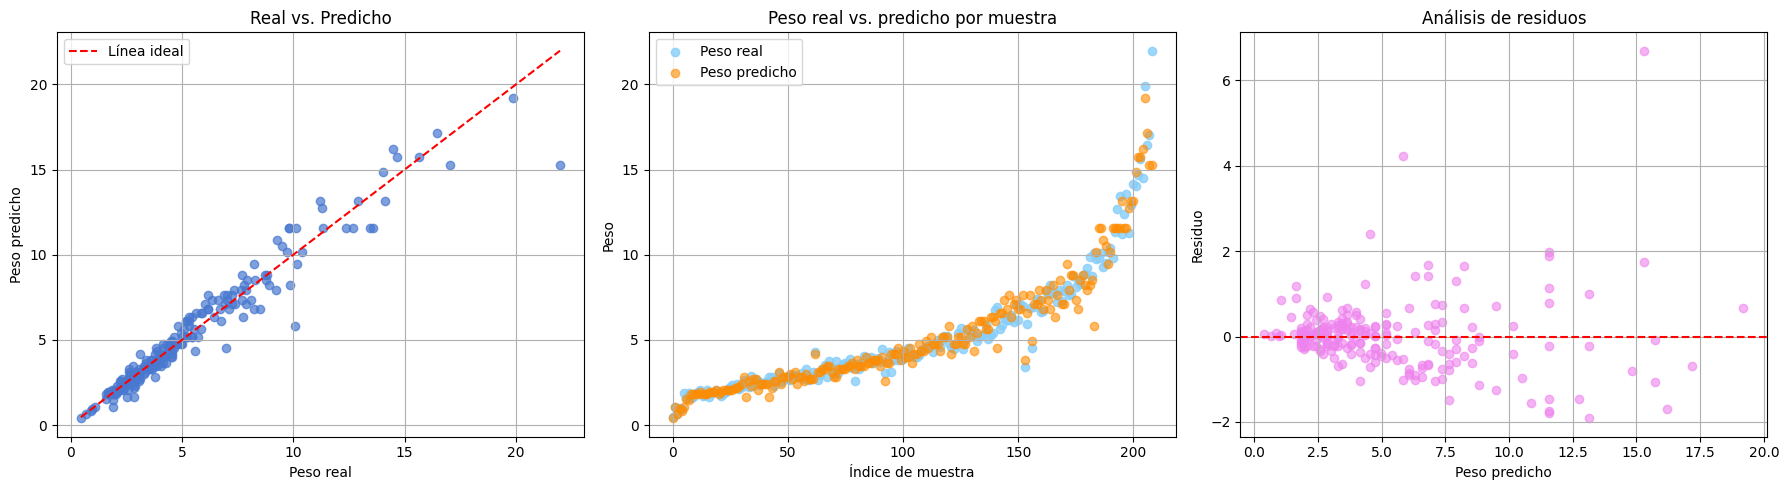

Modelo ajustado: W = 0.00933 · L^3.13480
R² = 0.9433
MAE = 0.5246 g
RSME = 0.8638 g
R²adj = 0.9430 g


In [3]:
def long_model(L,a,b):
    return a*L**b

params_long, _ = curve_fit(long_model, L, W)
a,b = params_long
W_pred_long = long_model(L, a,b)
r2_long = r2_score(W, W_pred_long)
r2_adj_long= 1 - (1 - r2_long) * (n - 1) / (n - 1 - 1)
rmse_long = np.sqrt(mean_squared_error(W, W_pred_long))
mae_long = mean_absolute_error(W, W_pred_long)

# Visualización ajuste

# Índices y residuos
indices = np.arange(len(W))
residuos = W - W_pred_long

# Crear la figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# === 1. Peso real vs. Peso predicho ===
axs[0].scatter(W, W_pred_long, alpha=0.7)
axs[0].plot([min(W), max(W)], [min(W), max(W)], 'r--', label='Línea ideal')
axs[0].set_xlabel('Peso real')
axs[0].set_ylabel('Peso predicho')
axs[0].set_title(f'Real vs. Predicho')
axs[0].legend()
axs[0].grid(True)

# === 2. Comparación por índice ===
axs[1].scatter(indices, W, color=CSS4_COLORS['lightskyblue'], label='Peso real', alpha=0.8)
axs[1].scatter(indices, W_pred_long, color=CSS4_COLORS['darkorange'], label='Peso predicho', alpha=0.6)
axs[1].set_xlabel('Índice de muestra')
axs[1].set_ylabel('Peso')
axs[1].set_title('Peso real vs. predicho por muestra')
axs[1].legend()
axs[1].grid(True)

# === 3. Gráfico de residuos ===
axs[2].scatter(W_pred_long, residuos, alpha=0.6, color=CSS4_COLORS['violet'])
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_xlabel('Peso predicho')
axs[2].set_ylabel('Residuo')
axs[2].set_title('Análisis de residuos')
axs[2].grid(True)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

# Resultados del ajuste

print(f"Modelo ajustado: W = {a:.5f} · L^{b:.5f}")
print(f"R² = {r2_long:.4f}")
print(f"MAE = {mae_long:.4f} g")
print(f"RSME = {rmse_long:.4f} g")
print(f"R²adj = {r2_adj_long:.4f} g")



### Modelo potencia peso - superficie: $W=a\cdot S^b$

Para un ajuste óptimo de este modelo hay que tener en cuenta que la morfología aplanada y asimétrica de los lenguados.

Dado que el lenguado es más ancho que alto y tiene una doerma similar a un disco aplanado, podemos usar la fórmula del área de una elipse como aproximación:

```{math}
S=\dfrac{\pi \cdot L \cdot A}{4}
```
Si tenemos en cuenta que el lenguado no es una elipse perfecta y que la superficie dorsal suele ser más curva de la ventral tendremos que aplicar un factor de corrección cuyo valor varía según la especie [[Turan C., 1999](https://www.researchgate.net/publication/255641396_A_Note_on_The_Examination_of_Morphometric_Differentiation_Among_Fish_Populations_The_Truss_System); [Jeong et al., 2013](https://doi.org/10.5370/JEET.2013.8.5.1194)] y que en el caso del lenguado puede estimarse $\approx 75-90 \%$ del área de la elipse definida por su longitud y anchura.

Este enfoque matemático sólo es aplicable si, como es este caso, el dataset no contiene un valor de superficie real obtenido mediante funciones de procesado de imagen que permita la segmentación precisa del contorno corporal del lenguado y el cálculo de su superficie proyectada mediante herramientas como `cv2.contourArea()`de OpenCV.


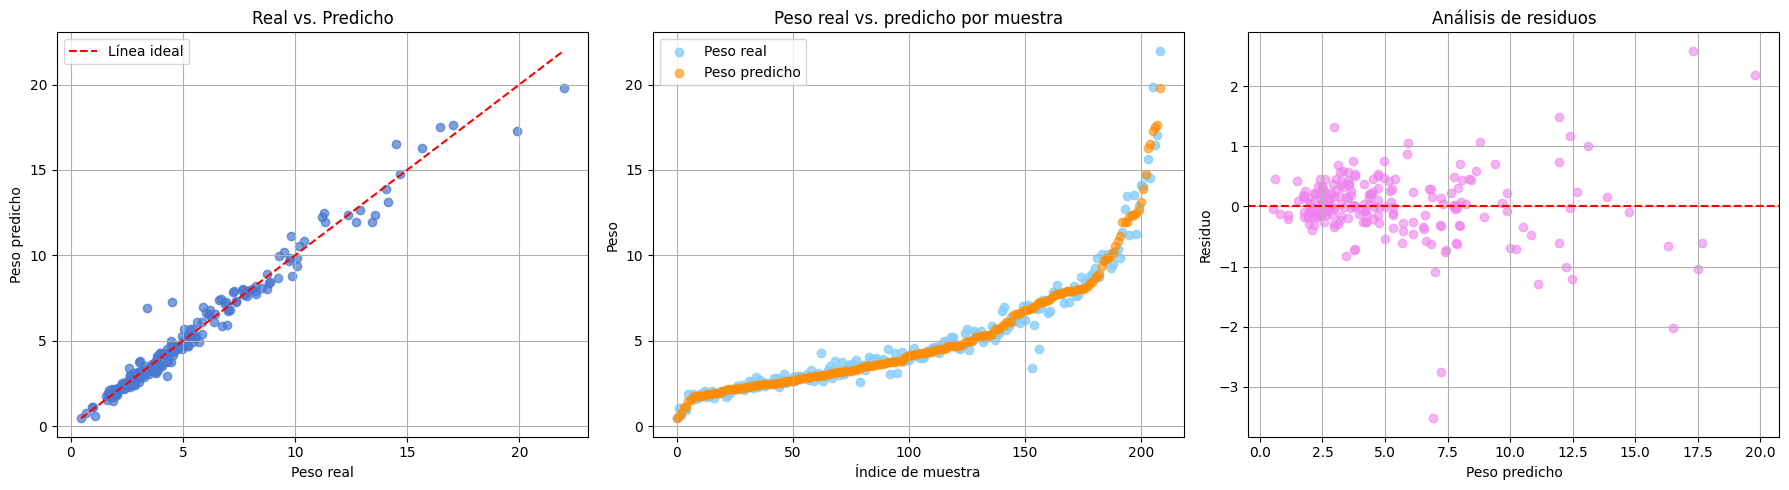

Modelo ajustado: W = 0.13360 · S_real^1.43623
S_real: 0.750 · 3.14159 · S/4
R² = 0.9733
MAE = 0.3734 g
RSME = 0.5925 g
R² adj = 0.9732 g


In [4]:
# Si el dataset contiene datos de superficie real:
# S = df['Superficie (cm2)'].values

# Si el dataset no contiene datos de superficie real:
S = L * A
coef = 0.75

def potencia_model(S, a, b):
    # Si hay datos de superficie real obtenidos por procesado de imagen entonces:
    # superficie_real = S
    superficie_real = coef * ((np.pi / 4) * S)
    return a * (superficie_real)**b

params_pow, _ = curve_fit(potencia_model, S, W)
a,b = params_pow
W_pred_pow = potencia_model(S, a, b)
r2_pow = r2_score(W, W_pred_pow)
r2_adj_pow = 1 - (1 - r2_pow) * (n - 1) / (n - 1 - 1)
rmse_pow = np.sqrt(mean_squared_error(W, W_pred_pow))
mae_pow = mean_absolute_error(W, W_pred_pow)

# Visualización ajuste

# Índices y residuos
indices = np.arange(len(W))
residuos = W - W_pred_pow

# Crear la figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# === 1. Peso real vs. Peso predicho ===
axs[0].scatter(W, W_pred_pow, alpha=0.7)
axs[0].plot([min(W), max(W)], [min(W), max(W)], 'r--', label='Línea ideal')
axs[0].set_xlabel('Peso real')
axs[0].set_ylabel('Peso predicho')
axs[0].set_title(f'Real vs. Predicho')
axs[0].legend()
axs[0].grid(True)

# === 2. Comparación por índice ===
axs[1].scatter(indices, W, color=CSS4_COLORS['lightskyblue'], label='Peso real', alpha=0.8)
axs[1].scatter(indices, W_pred_pow, color=CSS4_COLORS['darkorange'], label='Peso predicho', alpha=0.6)
axs[1].set_xlabel('Índice de muestra')
axs[1].set_ylabel('Peso')
axs[1].set_title('Peso real vs. predicho por muestra')
axs[1].legend()
axs[1].grid(True)

# === 3. Gráfico de residuos ===
axs[2].scatter(W_pred_pow, residuos, alpha=0.6, color=CSS4_COLORS['violet'])
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_xlabel('Peso predicho')
axs[2].set_ylabel('Residuo')
axs[2].set_title('Análisis de residuos')
axs[2].grid(True)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

# Resultados del ajuste
print(f"Modelo ajustado: W = {a:.5f} · S_real^{b:.5f}")
print(f"S_real: {coef:.3f} · {np.pi:.5f} · S/4")
print(f"R² = {r2_pow:.4f}")
print(f"MAE = {mae_pow:.4f} g")
print(f"RSME = {rmse_pow:.4f} g")
print(f"R² adj = {r2_adj_pow:.4f} g")

### Modelo alométrico Longitud - Anchura: $W=k \cdot L^a \cdot A^b$

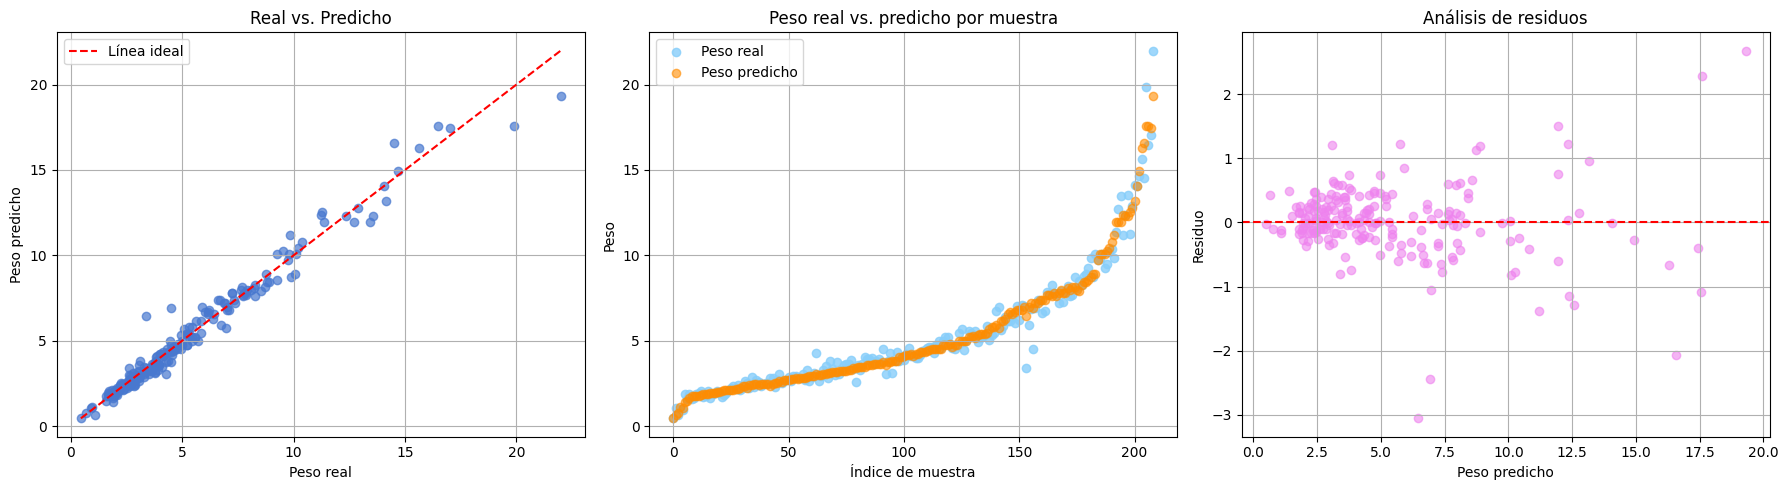

Modelo ajustado: W = 0.04891·L^1.644·A^1.272
R² = 0.9739
MAE = 0.3735 g
RSME = 0.5854 g
R² adj = 0.9737 g


In [5]:
def alometric_LA_model(X, k, a, b):
    L, A = X
    return k * (L**a) * (A**b)

params_la, _ = curve_fit(alometric_LA_model, (L, A), W)
k,a,b = params_la
W_pred_la = alometric_LA_model((L, A), k,a,b)
r2_la = r2_score(W, W_pred_la)
r2_adj_la = 1 - (1 - r2_la) * (n - 1) / (n - 2 - 1)
rmse_la = np.sqrt(mean_squared_error(W, W_pred_la))
mae_la = mean_absolute_error(W, W_pred_la)

# Índices y residuos
indices = np.arange(len(W))
residuos = W - W_pred_la

# Crear la figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))


# === 1. Peso real vs. Peso predicho ===
axs[0].scatter(W, W_pred_la, alpha=0.7)
axs[0].plot([min(W), max(W)], [min(W), max(W)], 'r--', label='Línea ideal')
axs[0].set_xlabel('Peso real')
axs[0].set_ylabel('Peso predicho')
axs[0].set_title(f'Real vs. Predicho')
axs[0].legend()
axs[0].grid(True)

# === 2. Comparación por índice ===
axs[1].scatter(indices, W, color=CSS4_COLORS['lightskyblue'], label='Peso real', alpha=0.8)
axs[1].scatter(indices, W_pred_la, color=CSS4_COLORS['darkorange'], label='Peso predicho', alpha=0.6)
axs[1].set_xlabel('Índice de muestra')
axs[1].set_ylabel('Peso')
axs[1].set_title('Peso real vs. predicho por muestra')
axs[1].legend()
axs[1].grid(True)

# === 3. Gráfico de residuos ===
axs[2].scatter(W_pred_la, residuos, alpha=0.6, color=CSS4_COLORS['violet'])
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_xlabel('Peso predicho')
axs[2].set_ylabel('Residuo')
axs[2].set_title('Análisis de residuos')
axs[2].grid(True)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

# Resultados del ajuste
print(f"Modelo ajustado: W = {k:.5f}·L^{a:.3f}·A^{b:.3f}")
print(f"R² = {r2_la:.4f}")
print(f"MAE = {mae_la:.4f} g")
print(f"RSME = {rmse_la:.4f} g")
print(f"R² adj = {r2_adj_la:.4f} g")

### Modelo de potencia volumétrico: $W=a \cdot (c\cdot V)^b$

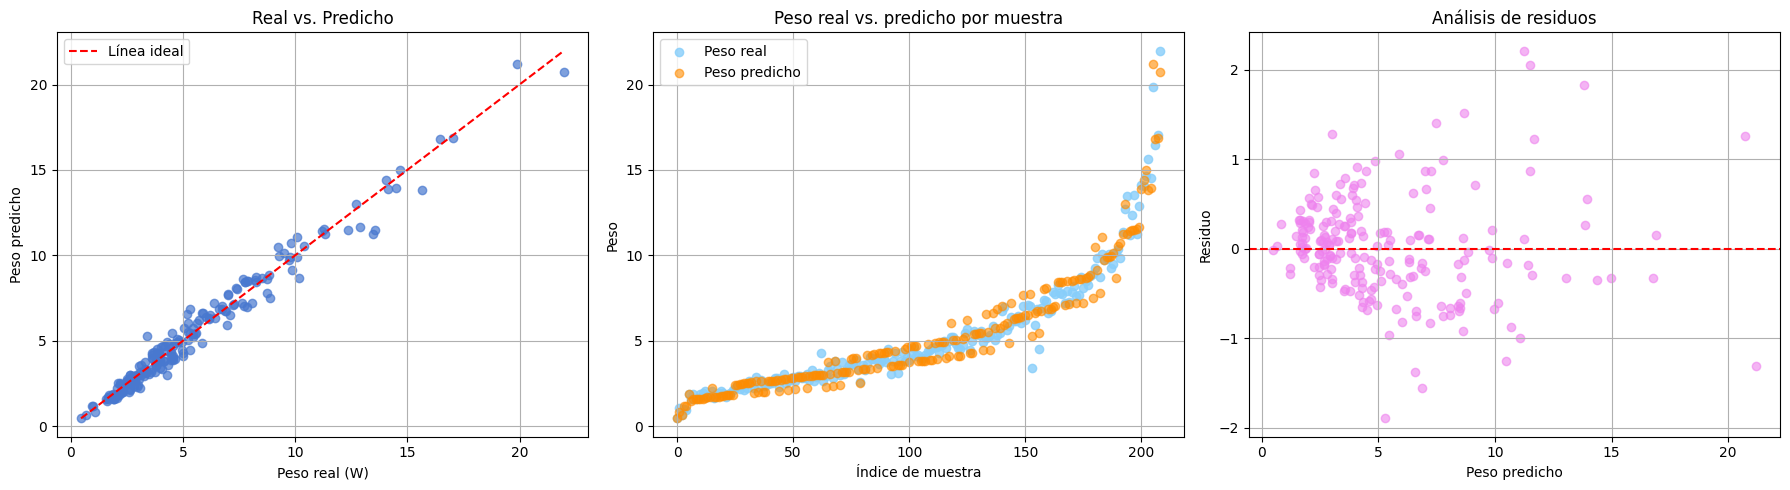

Modelo ajustado: W = 0.75546 · (0.720V)^0.95762
R² = 0.9746
MAE = 0.4241 g
RSME = 0.5785 g
R² adj = 0.9744 g


In [6]:
# Factor de compresión dorsoventral
c = 0.72

def volumen_model(V, a, b):
    return a * (c * V)**b

params_vol, _ = curve_fit(volumen_model, V, W)
a,b = params_vol
W_pred_vol = volumen_model(V, *params_vol)
r2_vol = r2_score(W, W_pred_vol)
r2_adj_vol = 1 - (1 - r2_vol) * (n - 1) / (n - 1 - 1)
rmse_vol = np.sqrt(mean_squared_error(W, W_pred_vol))
mae_vol = mean_absolute_error(W, W_pred_vol)

# Visualización ajuste
indices = np.arange(len(W))
residuos = W - W_pred_vol

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# === 1. Peso real vs. Peso predicho ===
axs[0].scatter(W, W_pred_vol, alpha=0.7)
axs[0].plot([min(W), max(W)], [min(W), max(W)], 'r--', label='Línea ideal')
axs[0].set_xlabel('Peso real (W)')
axs[0].set_ylabel('Peso predicho')
axs[0].set_title(f'Real vs. Predicho')
axs[0].legend()
axs[0].grid(True)

# === 2. Comparación por índice ===
axs[1].scatter(indices, W, color=CSS4_COLORS['lightskyblue'], label='Peso real', alpha=0.8)
axs[1].scatter(indices, W_pred_vol, color=CSS4_COLORS['darkorange'], label='Peso predicho', alpha=0.6)
axs[1].set_xlabel('Índice de muestra')
axs[1].set_ylabel('Peso')
axs[1].set_title('Peso real vs. predicho por muestra')
axs[1].legend()
axs[1].grid(True)

# === 3. Gráfico de residuos ===
axs[2].scatter(W_pred_vol, residuos, alpha=0.6, color=CSS4_COLORS['violet'])
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_xlabel('Peso predicho')
axs[2].set_ylabel('Residuo')
axs[2].set_title('Análisis de residuos')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Resultados del ajuste
print(f"Modelo ajustado: W = {a:.5f} · ({c:.3f}V)^{b:.5f}")
print(f"R² = {r2_vol:.4f}")
print(f"MAE = {mae_vol:.4f} g")
print(f"RSME = {rmse_vol:.4f} g")
print(f"R² adj = {r2_adj_vol:.4f} g")

### Modelo alométrico Longitud - Anchura - Altura: $W = k \cdot L^a \cdot A^b \cdot H^c$

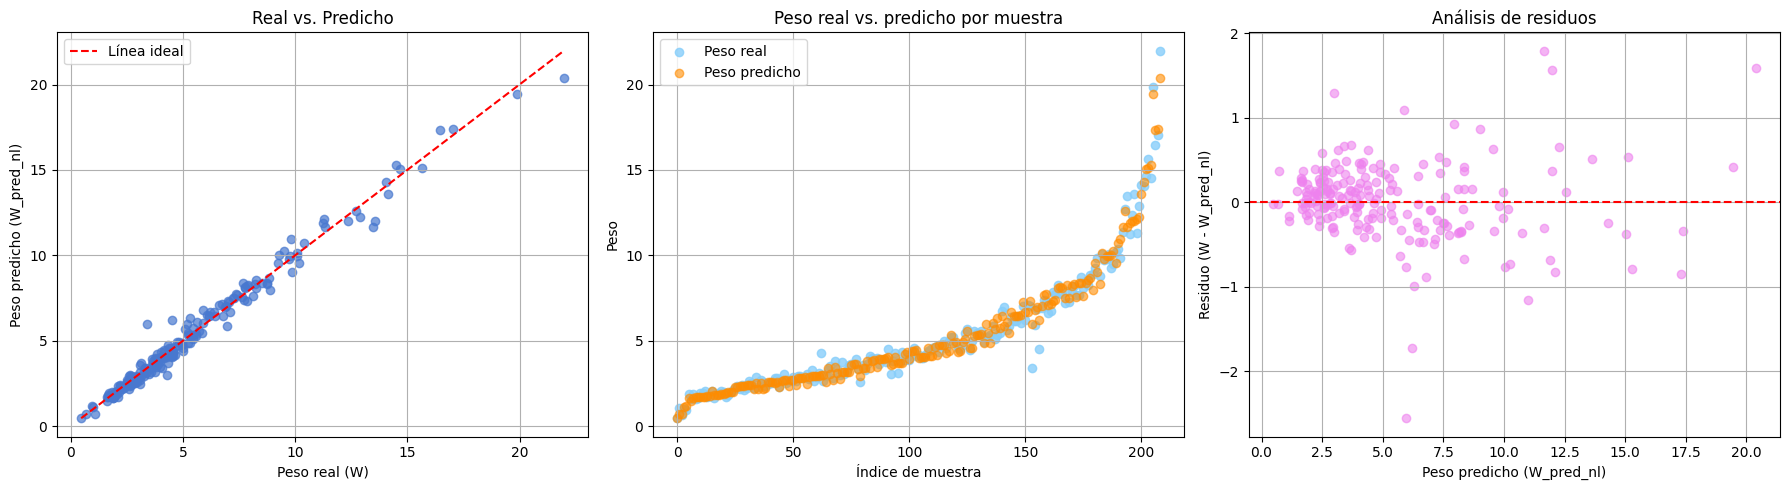

Modelo ajustado: W = 0.17609· L^1.24336 · A^1.16881· H^0.49480
R² = 0.9833
MAE = 0.3237 g
RSME = 0.4681 g
R² adj = 0.9831 g


In [7]:
def alometric_model(X, k, a, b, c):
    L, A, H = X
    return k * (L**a) * (A**b) * (H**c)

params_nl, _ = curve_fit(alometric_model, (L, A, H), W)
k,a,b,c = params_nl
W_pred_nl = alometric_model((L, A, H), k, a, b, c)
r2_nl = r2_score(W, W_pred_nl)
r2_adj_nl = 1 - (1 - r2_nl) * (n - 1) / (n - 3 - 1)
rmse_nl = np.sqrt(mean_squared_error(W, W_pred_nl))
mae_nl = mean_absolute_error(W, W_pred_nl)

# Índices de los datos
indices = np.arange(len(W))
residuos = W - W_pred_nl

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# === 1. Peso real vs. Peso predicho ===
axs[0].scatter(W, W_pred_nl, alpha=0.7)
axs[0].plot([min(W), max(W)], [min(W), max(W)], 'r--', label='Línea ideal')
axs[0].set_xlabel('Peso real (W)')
axs[0].set_ylabel('Peso predicho (W_pred_nl)')
axs[0].set_title(f'Real vs. Predicho')
axs[0].legend()
axs[0].grid(True)

# === 2. Comparación por índice ===
axs[1].scatter(indices, W, color=CSS4_COLORS['lightskyblue'], label='Peso real', alpha=0.8)
axs[1].scatter(indices, W_pred_nl, color=CSS4_COLORS['darkorange'], label='Peso predicho', alpha=0.6)
axs[1].set_xlabel('Índice de muestra')
axs[1].set_ylabel('Peso')
axs[1].set_title('Peso real vs. predicho por muestra')
axs[1].legend()
axs[1].grid(True)

# === 3. Gráfico de residuos ===
axs[2].scatter(W_pred_nl, residuos, alpha=0.6, color=CSS4_COLORS['violet'])
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_xlabel('Peso predicho (W_pred_nl)')
axs[2].set_ylabel('Residuo (W - W_pred_nl)')
axs[2].set_title('Análisis de residuos')
axs[2].grid(True)

plt.tight_layout()
plt.show()


# Resultados del ajuste
print(f"Modelo ajustado: W = {k:.5f}· L^{a:.5f} · A^{b:.5f}· H^{c:.5f}")
print(f"R² = {r2_nl:.4f}")
print(f"MAE = {mae_nl:.4f} g")
print(f"RSME = {rmse_nl:.4f} g")
print(f"R² adj = {r2_adj_nl:.4f} g")


## Comparativa de modelos analizados

In [8]:
modelos = ['Longitud', 'Superficie', 'Longitud-Anchura', 'Volumen', 'Longitud-Anchura-Altura']
r2 = [r2_long, r2_pow, r2_la, r2_vol, r2_nl]
r2_adj = [r2_adj_long, r2_adj_pow, r2_adj_la, r2_adj_vol, r2_adj_nl]
rmse = [rmse_long, rmse_pow, rmse_la, rmse_vol, rmse_nl]
mae = [mae_long, mae_pow, mae_la, mae_vol, mae_nl]

results = pd.DataFrame({
    'Modelo Peso vs.': modelos,
    'R²': r2,
    'R² ajustado': r2_adj,
    'RMSE': rmse,
    'MAE': mae
})
results

,Modelo Peso vs.,R²,R² ajustado,RMSE,MAE
0,Longitud,0.943280,0.943006,0.863761,0.524589
1,Superficie,0.973307,0.973178,0.592544,0.373385
2,Longitud-Anchura,0.973946,0.973693,0.585408,0.373508
3,Volumen,0.974558,0.974435,0.578497,0.424128
4,Longitud-Anchura-Altura,0.983343,0.983099,0.468080,0.323711


## Conclusiones
El análisis comparativo de los cinco modelos lineales desarrollados para predecir el peso de alevines de *Solea solea* revela que la adición progresiva de variables morfológicas incrementa el poder explicativo desde un $R^{2}$ de $0,94$, obtenido con la longitud como único predictor, hasta un $0,98$ cuando se incorporan longitud, anchura y altura. Esta mejora se traduce en una reducción del error cuadrático medio (RMSE) de $0,86\,g$ a $0,47\,g$ y del error absoluto medio (MAE) de $0,52\,g$ a $0,32\,g$. No obstante, la ganancia marginal entre los modelos basados en superficie (longitud × anchura) y los que incluyen altura o volumen apenas alcanza $0,11–0,12\,g$ en RMSE, lo que sugiere rendimientos decrecientes al introducir la tercera dimensión. Dado que la altura exige una adquisición estereoscópica o reconstrucción volumétrica costosa y propensa a errores, mientras que longitud y anchura se obtienen con alta precisión mediante sistemas de visión artificial 2‑D, el modelo de superficie emerge como la opción óptima para estimaciones en línea de la biomasa durante el grading industrial.

Sin embargo, los coeficientes de ajuste fueron calculados sobre el conjunto completo de 209 individuos sin partición de entrenamiento y prueba ni validación cruzada, lo que introduce un sesgo optimista difícil de cuantificar. Además, la ausencia de diagnósticos de normalidad de residuos y de colinealidad entre predictores cuestiona la solidez estadística de los modelos multivariantes y aconseja la aplicación de transformaciones alométricas y técnicas de regularización antes de su despliegue. Bajo un escenario operativo en el que los límites de talla están separados varias veces el MAE (~0,37 g para el modelo de superficie), el error residual estimado parece compatible con la precisión requerida; con todo, resulta imprescindible fijar umbrales de aceptabilidad. En síntesis, la modelización basada en longitud y anchura proporciona una estimación robusta y operacionalmente viable del peso de *S. solea*, mientras que la inclusión de la altura ofrece beneficios estadísticos marginales que no compensan la complejidad práctica añadida sin una validación rigurosa que confirme su ventaja.